# 机器人世界1-D

### 介绍
在本纳米学位课程中，你将会看到呈现方式不同的两种机器人概率分布：
* 离散式概率分布
* 连续式概率分布

当你在划分为方格网的地图上跟踪一个机器人的移动情况时，要使用离散概率分布。其中，每个网格都是机器人可以定位的离散位置。

在本练习中，你将使用概率分布表示机器人位置的不确定性。


## 机器人初始化
想象一下，你有一个生活在一维世界中的机器人。这个机器人依存于九个不同空间的网格。它只能向前或向后移动。如果它从网格上脱落下来，则会绕回到另一侧。

这个机器人有一张地图，这样它可以知道只有九个空格。但机器人不知道它在地图上的位置。下面就是该一维地图。

![1-D Robot World](1D_world.jpg "1-D Robot World")

第一次打开该机器人时，它在这些空间中的任何一个网格上的概率是1/9；其含义是该机器人在网格上任何一个空间的概率相等。


# 练习1 - 初始概率

现在，编写一个函数，输入机器人世界中的空间数量，然后返回一个包含网格上每个空间的初始概率的列表。

 因此，在目前给出的例子中，将会有一个包含九个概率的列表。该列表中的每个值都是1/9。请牢记，因为机器人一开始并不知道它在哪里，所以在任何空间中的可能性都是一样的。

Python的 list.append（）方法可能会有用。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def initialize_robot(grid_size):
    
    grid = []
    # TODO: for each space on the map grid, store the initial probability
    # in the grid list. For example, if there are eight spaces on the grid,
    # the grid list should have eight entries where each entry represents
    # the initial probability of the robot being in that space.
    for i in range(grid_size):
        grid.append(1/grid_size)
    
    return grid

运行下面的单元格，确保你的函数输出的是正确的结果。

In [2]:
# Result should be a list with 9 elements all having value 1/9
assert initialize_robot(9) == [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]

# Result should be a list with 4 elements all having value 1/4
assert initialize_robot(4) == [1/4, 1/4, 1/4, 1/4]

print('Hooray! You just initialized a discrete probability distribution')

Hooray! You just initialized a discrete probability distribution


# 练习2 - 网格概率

现在，编写一个名为 `grid_probability` 的函数，输出机器人位于网格上特定点的概率。该函数的输入将是：

* 先前函数的输出（即代表概率的一维映射的列表）
* 你想知道的某一处的概率的网格编号

所以如果你想知道当前机器人在网格上的第五个网格上的概率，你可以调用如下函数：

`grid_probability(my_grid, 4)`.

为什么函数输入是4而不是5呢？ 想一想Python如何访问列表中的值。 键入`mylist[0]` 可以为你提供列表中的第一个元素。 键入 `mylist[1]`  可以为你提供列表中的第二个元素。

In [3]:
def grid_probability(grid, position):
    
    ##### 
    # TODO: Use an if statement to make sure that the position input
    # does not go beyond the size of the list. Say the list has five elements
    # and your code tries to access grid[5] or grid[6]. That will lead to an 
    # error. 
    if position >(len(grid)-1) or position<0:
        return None
    # TODO: If the position input is legitimate, then return the probability
    # stored at that position. If the position input is not legitimate, then
    # return None
    #####
    
    return grid[position]


运行下面的单元格，测试代码的结果。 如果grid_probability函数按预期运行，则该代码单元格应该输出“Awesome work！”。

In [4]:
assert grid_probability([.1, .1, .2, .1, .5], 2) == 0.2
    
assert grid_probability([.1, .1, .2, .1, .5], 7) == None

print('Awesome work!')

Awesome work!


# 练习3 - 将机器人世界可视化

接下来，编写一个输出条形图的函数，显示每个网格空间的概率。

请牢记，我们正在使用离散概率分布；机器人的位置只能取一定的数值，例如方格1，方格2，方格3，方格4等。

网格编号将位于x轴上。对于离散概率分布来说，y轴表示概率。

函数的输入是一个列表，其中机器人位于网格上的每个点上。

你的结果应该是这样的：

![Uniform Probability Distribution](uniform_prob.png "Uniform Probability Distribution")

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def output_map(grid):
    
    ###
    # TODO: Start by creating a list to represent the x-axis labels.
    # For example, if the grid variable has length 5, x_labels would contain
    # a list [0, 1, 2, 3, 4]. 
    #
    # HINT: Python's built in len() and range() functions might
    #       be useful. If you are not sure how to use these
    #       functions, look them up in a search engine.
    #       For example, in google, look up "Python len".
    ###
    
    x_labels = range(len(grid))
    
    ###
    # TODO: Using matplotlib, output a bar chart of the results.
    # Notice that we have already imported the matplotlib library
    # at the top of this code cell.
    plt.bar(x_labels,grid)
    # If you are unsure how to make a bar chart, go back to the 
    # "Plotting in Python demonstration" to see an example.
    plt.xlabel('Grid Space')
    plt.ylabel('Probability')
    plt.title('Probability of the robot  being at each space on the grid')
    # Make sure your plot has an xlabel, a ylabel, and a title
    # Don't forget that the last line needs to be plt.show() so
    # that your visualization prints out to the screen.

运行下面的代码单元格，查看可视化结果。你的结果应该是这样的：

![Robot 1D Visualization](robot1D.png "1D Robot Visualization")

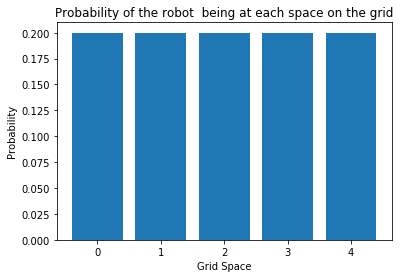

In [6]:
output_map([.2, .2, .2, .2, .2])

### 练习4 - 更新概率

最后的这个问题最具挑战性。你必须考虑循环和列表索引的工作方式。

随着机器人四处移动并感知其周围环境，它将更新其对地图上位置的判断。你将在接下来的本地化课程中了解这一点。

#### 说明

现在，编写一个函数，更新每个网格空间的概率。该函数的两个输入如下：

* 包含机器人在地图网格上的每个点的概率的列表
* 包含新概率的列表清单。列表中的每个元素都有两个条目：第一个条目是地图网格上的一个点，第二个条目是更新的概率。

#### 示例输入和输出
以下是一些示例输入：

机器人使用五格网图进行初始化，因此列表中的概率是

* `robot_grid = [0.2, 0.2, 0.2, 0.2, 0.2]`

机器人发现，实际上它在第一个点 `robot_grid[0]`的概率为0.4，而在其他所有点的概率为0.15。所以第二个输入是类似这样的

* `updates = [[4, 0.15], [0, .4], [3, 0.15], [1, 0.15], [2, 0.15]]`

 请注意，第二个输入并不是地图网格的顺序。第一个值是网格5（索引为4），然后是网格1（索引为0），然后是网格2（索引为3），以此类推。

更新变量也可能如下所示，不包含有关整个网格的信息：
* `updates = [3, 0.1], [4, 0.2]`

因此，请考虑如何使用更新变量中的信息正确更改robot_grid中的值。

该函数的输出将是更新后的概率列表：

* [0.4, 0.15, 0.15, 0.15, 0.15]

#### 提示

要同时理解所有这些信息，可能会很困难。尝试拿出铅笔和纸来解决这个问题吧。

In [39]:
def update_probabilities(grid, updates):
        
    ###
    # TODO: write a for loop that goes through the updates list 
    # and replaces the probabilities in the grid variable.
    #
    # Here are a few HINTS:
    #     You can change a value in the grid variable like this:
    #         grid[0] = .5  where the 0 represents the first grid space
    #
    #     To access values in a list of lists, you need two brackets.
    #     
    #     For example, say 
    #     updates = [[5, 0.15], [0, .4], [3, 0.15], [1, 0.15], [2, 0.15]]
    #
    #     updates[0] will give you access to the first element in the list,
    #        which  is [5, 0.15].
    #
    #     updates[0][0] gives you access to the first element of [5, 0.15]
    #        or in other words the value 5. updates[0][1] gives you access
    #        to the value 0.15.
    #    
    ###
    for i,j in updates:
        grid[i] = j
    return grid


运行下面的代码单元格，测试你的updates_probabilities函数。

In [40]:
assert update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[0, .4], [1, 0.15], [2, 0.15], [3, 0.15], [4, 0.15]]) == [0.4, 0.15, 0.15, 0.15, 0.15]
assert update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[1, 0.15], [0, .4], [4, 0.15], [2, 0.15], [3, 0.15]]) == [0.4, 0.15, 0.15, 0.15, 0.15]
assert update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[0, .25], [4, 0.15]]) == [0.25, 0.2, 0.2, 0.2, 0.15]

print('Everything looks good!')

Everything looks good!
